## **텍스트마이닝(윤상혁 교수)**
## ch3. 토픽모델링
## ch3_01. LDA토픽모델링


---

In [4]:
# konlpy 패키지 설치: 한국어 형태소 분석을 위한 라이브러리입니다.
!pip install konlpy

In [5]:
# pandas 라이브러리를 pd라는 이름으로 임포트: 데이터 처리를 위한 주요 라이브러리입니다.
import pandas as pd

# konlpy 라이브러리에서 Okt 형태소 분석기를 임포트: 한국어 텍스트를 형태소 단위로 분석합니다.
from konlpy.tag import Okt

# 엑셀 파일을 데이터프레임 형태로 불러오기: 분석할 뉴스 데이터를 불러옵니다.
df = pd.read_excel('NewsResult_20250603-20250703.xlsx')


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100311e+06,20250703,서울경제,"우승호 기자,이은재 인턴기자","""적자 또 적자"" 방전된 '2차전지株' ""상반기 美주식 '우수수'"" 중학개미만 웃었...",경제>산업_기업,경제>증권_증시,경제>금융_재테크,범죄>기업범죄>거래제한,사고>산업사고>화재,NaN,"트럼프,이창민,이재광","미국주,미국,중국,중국주만,경기,중국주,쯔진마이닝,춘절,美","KB국민은행,프리 IPO,저축은,HD현대,일동홀딩스,쯔진마이닝그룹,BYD,저축,NH...","적자,적자,방전,2차,전지,상반기,주식,중학개미,AI,프리즘,주식투자자,중국,쯔진마...","계열사,상반기,중국,투자자,테슬라,중국주,hd,미국주,주식투자자,ai,신용대출,보통...",▲ AI 프리즘* 맞춤형 경제 브리핑 \n \n\n * 편집자 주: ‘AI PRIS...,http://www.sedaily.com/NewsView/2GV7FEM76R,NaN
1,1.500701e+06,20250703,부산일보,김덕준,"공인중개사 자격증 55만명, 개업 11만명 그나마 계속 감소",경제>유통,경제>부동산,경제>금융_재테크,NaN,NaN,NaN,NaN,"서울,경기,고금","용산구,공인중개사,연합뉴스,한국공인중개사협회,경영연구소,KB금융지주","55만,공인,중개사,자격증,개업,감소,1년,감소,2023년,2월,2년,개월째,자격증...","부동산,공인중개사,11만,중개사,사무실,자격증,보유자,55만,서울,거래량,업황",사진은 서울 용산구의 한 부동산 공인중개사 사무실 모습. 연합뉴스\n\n\n\n 부...,https://www.busan.com/view/busan/view.php?code...,NaN
2,2.100101e+06,20250703,매일경제,원호섭 기자(wonc@mk.co.kr),"리플, 은행 면허 신청 스테이블코인 직접 관리 노린다",경제>산업_기업,경제>금융_재테크,NaN,NaN,NaN,NaN,NaN,"미국,피델,신탁","위즈덤트리,와이오밍주,CNBC,Fed,중앙은행,리플,연준,통화감독청,OCC","리플,신청,은행,면허,스테이블코,관리,리플,RLUSD,발행사,계좌,연준,마스터,동시...","미국,스테이블코,occ,뱅크인,영업시간,연준,발행사,rlusd,크립토,선제적,블룸버...",RLUSD 발행사 리플 \n연준 마스터 계좌도 동시 신청\n\n미국 암호화폐 기업 ...,http://www.mk.co.kr/article/11358335,NaN
3,2.100311e+06,20250703,서울경제,"우승호 기자,이은재 인턴기자","대출규제 발표날 ‘마통 16배’ 늘었다 '영끌' 틀어막는 정부 ""'연소득 내' 신용...",경제>금융_재테크,경제>산업_기업,경제>증권_증시,범죄>기업범죄>거래제한,NaN,NaN,NaN,"신사,최대주주,대주주,계산,고금","KB국민은행,신한금융,우리은행,신한금융그룹,우리금융,여신금융협회,금융위원회,우리금융...","대출,규제,마통,정부,신용대출,카드론,포함,AI,프리즘,금융상품,투자자,대출,규제,...","마이너스통장,대출규제,카드론,신용대출,ai,종합금융그룹,대환,신한금융,우리금융,금융...",▲ AI 프리즘* 맞춤형 경제 브리핑 \n \n\n * 편집자 주: ‘AI PRIS...,http://www.sedaily.com/NewsView/2GV7EWQH5D,NaN
4,1.100751e+06,20250703,아시아투데이,NaN,"공인중개사 개업 사무실, 4년 5개월만 최저 대출규제 겹악재까지",경제>부동산,NaN,NaN,NaN,NaN,NaN,NaN,고금,"정부,아시아투데이,공인중개,한국공인중개사협회","사무실,공인,중개사,개업,최저,대출규제,겹악재,아시아투데,전원준,침체,부동산,시장,...","공인중개사,11만,부동산,중개사,보유자,자격증,사무실,공인중개사무소,감염증,사무소,...",아시아투데이 전원준 기자 = 부동산 시장 침체가 장기화하면서 공인중개사무소를 유지 ...,https://www.asiatoday.co.kr/view.php?key=20250...,NaN


In [7]:
# '제목'과 '본문' 컬럼을 합쳐 '제목_본문'이라는 새로운 컬럼을 생성합니다.
df['제목_본문']=df['제목']+' '+ df['본문']

In [8]:
df['제목_본문']

,제목_본문
0,"""적자 또 적자"" 방전된 '2차전지株' ""상반기 美주식 '우수수'"" 중학개미만 웃었..."
1,"공인중개사 자격증 55만명, 개업 11만명 그나마 계속 감소 사진은 서울 용산구의 ..."
2,"리플, 은행 면허 신청 스테이블코인 직접 관리 노린다 RLUSD 발행사 리플 \n연..."
3,"대출규제 발표날 ‘마통 16배’ 늘었다 '영끌' 틀어막는 정부 ""'연소득 내' 신용..."
4,"공인중개사 개업 사무실, 4년 5개월만 최저 대출규제 겹악재까지 아시아투데이 전원준..."
...,...
3168,"'집값 들썩, 규제 들먹' 8년전 닮은 주택시장 대선 뒤엔? [안장원의 부동산 노트..."
3169,"공급은 절벽, 월세는 부담 7월이 더 두려운 ‘전셋값 신고가’ 전세 물량 올해 초보..."
3170,"경기, 이달 아파트 1만295가구 분양 '전국 물량 40%' 맡는다 6월 경기도내에..."
3171,"한국해양진흥공사, 중소선사 CEO간담회 개최 한국해양진흥공사는 지난달 29일 서울 ..."


In [9]:
# Okt 형태소 분석기 객체를 생성합니다. 한국어 텍스트 분석을 위한 준비 단계입니다.
okt = Okt()

# 텍스트 데이터를 형태소 단위로 분석하여 특정 품사(명사, 형용사, 동사)만 추출하는 함수입니다.
def tokenizer(txt) :
    morph=okt.pos(txt)
    words=[]
    for word, tag in morph :
#        if tag in ['Noun', 'Adjective', 'Verb'] : # 명사, 동사, 형용사만 가져오도록
        if tag in ['Noun'] : # 명사만 가져오도록
            if len(word) > 1 :
                words.append(word)

    return words

In [10]:
text='나는 어제 영어 공부를 열심해 했다'

In [11]:
okt = Okt()
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('어제', 'Noun'),
 ('영어', 'Noun'),
 ('공부', 'Noun'),
 ('를', 'Josa'),
 ('열', 'Modifier'),
 ('심해', 'Noun'),
 ('했다', 'Verb')]

In [12]:
# 데이터프레임의 모든 데이터를 문자열 타입으로 변환합니다. 이는 형태소 분석을 위한 준비 단계입니다.
df = df.astype('str')

#'제목_본문' 컬럼에 tokenizer 함수를 적용하여, 형태소 분석을 수행하고 결과를 다시 해당 컬럼에 저장합니다.
df['제목_본문']=df['제목_본문'].apply(tokenizer)

# 데이터프레임의 모든 열을 문자열 타입으로 변환합니다. 안전한 파일 저장을 위한 단계입니다.
df=df.astype('str')

# 데이터프레임을 '정제파일.csv'로 저장합니다. 분석 결과를 파일로 저장하는 단계입니다.
df.to_csv('process.csv', encoding='utf8')

In [13]:
df['제목_본문']

,제목_본문
0,"['적자', '적자', '방전', '상반기', '주식', '우수수', '중학', '..."
1,"['공인', '중개사', '자격증', '개업', '계속', '감소', '사진', '..."
2,"['리플', '은행', '면허', '신청', '테이블', '코인', '직접', '관..."
3,"['대출', '규제', '발표', '마통', '정부', '소득', '신용', '대출..."
4,"['공인', '중개사', '개업', '사무실', '개월', '최저', '대출', '..."
...,...
3168,"['집값', '규제', '주택', '시장', '대선', '안장', '부동산', '노..."
3169,"['공급', '절벽', '월세', '부담', '셋값', '신고', '전세', '물량..."
3170,"['경기', '아파트', '가구', '분양', '전국', '물량', '경기도', '..."
3171,"['한국', '해양', '진흥', '공사', '중소', '선사', '간담', '개최..."


# 빈도분석 및 워드크라우드 시각화

In [14]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer 임포트
df = pd.read_csv('process.csv', encoding='utf-8')
#불용어를 처리합니다.
stop_words=['객원','사설','대출','규제']

###최대개수설정
cv = CountVectorizer(ngram_range=(1,1), max_features=3000, stop_words=stop_words)

# CountVectorizer를 사용하여 '제목_본문' 컬럼의 텍스트 데이터를 문서-단어 행렬로 변환합니다.
tdm = cv.fit_transform(df['제목_본문'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성합니다. 이는 단어 사용 빈도 분석을 위한 단계입니다.
word_count_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬합니다. 이는 가장 자주 사용된 단어를 확인하기 위한 단계입니다.
word_count_tf= word_count_tf.sort_values('빈도',ascending=False)

# 단어 빈도수를 'word_count.xlsx' 엑셀 파일로 저장합니다. 결과를 저장하는 단계입니다.
word_count_tf.to_excel('word_count.xlsx')

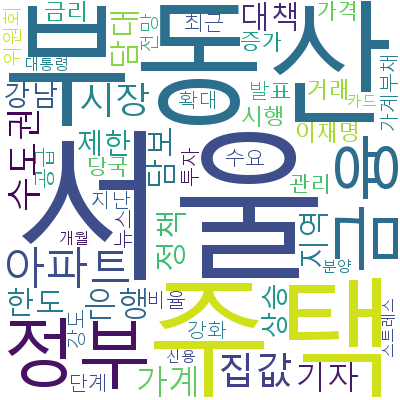

In [15]:
# WordCloud 라이브러리를 임포트합니다: 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = 'malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path,width=400, height=400)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud 생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_file('word_cloud.png')
cloud.to_image()

# TF-IDF 및 워드크라우드 시각화

In [16]:
# TfidfTransformer를 임포트합니다: TF-IDF 값을 계산하기 위한 도구입니다.
from sklearn.feature_extraction.text import TfidfTransformer

# TfidfTransformer 객체를 생성합니다. 이는 문서-단어 행렬의 단어 빈도수를 TF-IDF 값으로 변환하기 위한 준비 단계입니다.
trans= TfidfTransformer()

# 문서-단어 행렬에 대해 TF-IDF 변환을 수행합니다. 이는 각 단어의 중요도를 수치화하는 단계입니다.
dtm2 = trans.fit_transform(tdm)

# 단어와 그 TF-IDF 값을 담은 데이터프레임을 생성합니다. 이는 단어의 중요도 분석을 위한 단계입니다.
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': tdm.sum(axis=0).flat})

# TF-IDF 값을 기준으로 내림차순으로 정렬합니다. 이는 중요한 단어를 확인하기 위한 단계입니다.
df2 = df2.sort_values('tf-idf',ascending=False)

# 인덱스를 재설정합니다. 이는 데이터의 가독성을 높이기 위한 단계입니다.
df2=df2.reset_index(drop=True)
df2.index=df2.index+1

# TF-IDF 값을 'tf_idf.csv' 파일로 저장합니다. 결과를 저장하는 단계입니다. 인코딩을 cp949로 설정하여 한글이 깨지지 않게 합니다.
df2.to_csv('tf_idf.csv', encoding='cp949')

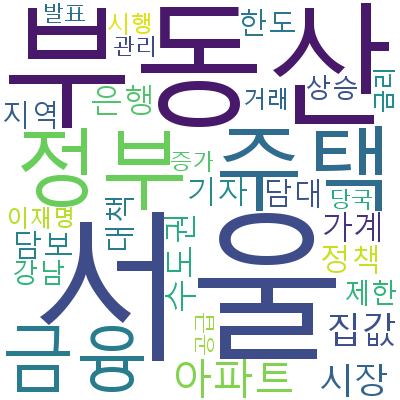

In [17]:
from wordcloud import WordCloud  # WordCloud 임포트

# 한글 폰트 경로 지정
font_path = 'malgun.ttf'

# WordCloud 객체를 다시 생성합니다. 이번에는 TF-IDF 값을 기반으로 가장 중요한 단어를 시각화합니다.
wc = WordCloud(background_color='white', max_words=30, font_path=font_path,width=400, height=400)

# TF-IDF 값을 기반으로 단어 빈도 사전을 생성합니다.
count_dic = dict(zip(df2['단어'], df2['tf-idf']))

# WordCloud를 이용해 TF-IDF 값을 시각화합니다. 이는 중요한 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

# LDA분석

In [18]:
!pip install pyldavis

In [19]:
# LDA 분석을 위한 라이브러리 임포트
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pandas as pd

In [20]:
# CSV 파일에서 데이터 불러오기
data = pd.read_csv('process.csv', encoding='utf-8')
data = data.astype('str')
data=data['제목_본문']

In [21]:
data

,제목_본문
0,"['적자', '적자', '방전', '상반기', '주식', '우수수', '중학', '..."
1,"['공인', '중개사', '자격증', '개업', '계속', '감소', '사진', '..."
2,"['리플', '은행', '면허', '신청', '테이블', '코인', '직접', '관..."
3,"['대출', '규제', '발표', '마통', '정부', '소득', '신용', '대출..."
4,"['공인', '중개사', '개업', '사무실', '개월', '최저', '대출', '..."
...,...
3168,"['집값', '규제', '주택', '시장', '대선', '안장', '부동산', '노..."
3169,"['공급', '절벽', '월세', '부담', '셋값', '신고', '전세', '물량..."
3170,"['경기', '아파트', '가구', '분양', '전국', '물량', '경기도', '..."
3171,"['한국', '해양', '진흥', '공사', '중소', '선사', '간담', '개최..."


In [22]:
# 'data' 리스트에 저장된 텍스트 데이터(예: '제목_본문')를 공백 기준으로 분할하여 토큰 리스트를 생성합니다.
token = [keywords.split() for keywords in data]
# 토큰 리스트를 기반으로 Gensim의 Dictionary 객체를 생성합니다. 이 객체는 각 토큰에 고유한 ID를 매핑합니다.
# 결과적으로, 텍스트 데이터의 모든 유니크한 단어가 ID와 함께 딕셔너리로 관리됩니다.
id2word = corpora.Dictionary(token)

# 딕셔너리에서 빈도수 기반으로 단어를 필터링합니다. no_below와 no_above 파라미터를 사용하여,
# 너무 드물게 나타나는 단어(no_below 이하)와 너무 자주 나타나는 단어(no_above 이상)를 제거합니다.
# no_below=3는 각 단어가 최소 3개의 문서에 나타나야 함을 의미합니다.
# no_above=0.1는 전체 문서의 10% 미만에만 나타나는 단어를 유지함을 의미합니다.
id2word.filter_extremes(no_below=5, no_above=0.2)

# 최종적으로, 각 문서를 (단어 ID, 단어 빈도) 튜플의 리스트로 변환하는 문서-단어 빈도 매트릭스(corpus)를 생성합니다.
# 이 과정에서 각 문서 내에 있는 단어들이 얼마나 자주 나타나는지를 기록합니다.
# 이 corpus는 텍스트 데이터를 기반으로 한 다양한 모델링 작업(예: LDA 주제 모델링)에 사용될 수 있습니다.
corpus= [id2word.doc2bow(text) for text in token]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 1),
  (5, 3),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1)],
 [(23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 5),
  (31, 1),
  (32, 1),
  (33, 3),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 6),
  (41, 2),
  (42, 1),
  (43, 1)],
 [(37, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 3),
  (51, 1),
  (52, 1),
  (53, 4),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 3),
  (4, 1),
  (5, 3),
  (6, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (67, 1),
  (6

In [23]:
# numpy 라이브러리를 np라는 이름으로 가져옵니다. numpy는 다양한 수학적 연산을 위해 사용됩니다.
import numpy as np

perplexity_values = []

# 토픽의 수를 3에서 9까지 변화시키면서 LDA 모델의 퍼플렉시티를 계산합니다.
# 토픽 수가 변할 때마다 모델의 성능을 퍼플렉시티를 통해 평가합니다.
for i in range(3, 10):
    # LDA 모델을 생성합니다. 'num_topics=i'는 토픽의 수를 i로 설정합니다.
    # 'id2word'는 단어의 인덱스 매핑을 나타내는 사전입니다.
    # 'random_state=100'는 모델 결과의 재현 가능성을 위해 난수 생성기의 시드를 설정합니다.
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word, random_state=100)

    # 모델의 로그 퍼플렉시티를 계산하고, 이를 자연로그의 밑인 e를 기반으로 하는 지수 함수로 변환하여
    # 퍼플렉시티를 계산합니다. 퍼플렉시티 값이 낮을수록 모델이 데이터를 더 잘 설명하고 있다는 의미입니다.
    perplexity = np.exp(ldamodel.log_perplexity(corpus))

    # 계산된 퍼플렉시티를 리스트에 추가합니다.
    perplexity_values.append(perplexity)

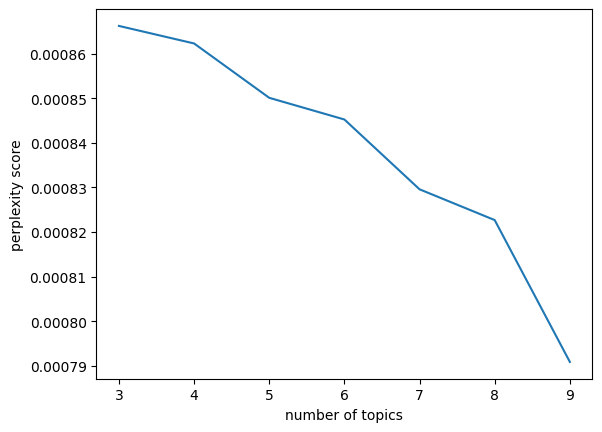

In [24]:
# Perplexity 그래프 시각화
import matplotlib.pyplot as plt

x = range(3, 10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [25]:
from gensim.models import CoherenceModel  # CoherenceModel 임포트

coherence_values = []
# 다양한 토픽 수에 대해 Coherence 계산
for i in range(3, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word,random_state=100)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=token, dictionary=id2word, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

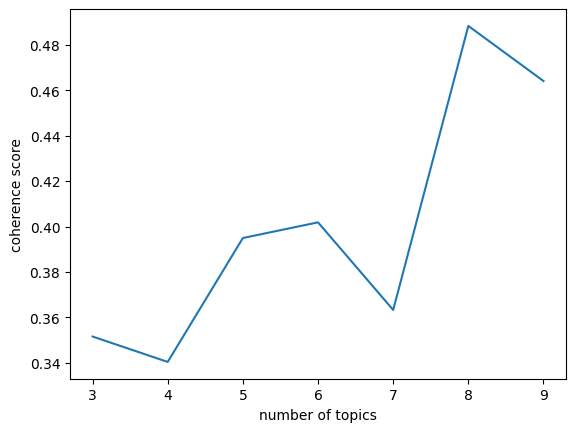

In [26]:
x = range(3, 10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [27]:
k=8 ###적정토픽수 입력 coherence를 최대로 하고 perpelxity를 최소로 하는 적절합 토픽수

In [28]:
#적정토픽에 해당 되는 단어를 구하기!
from gensim import corpora, models
# 적절한 토픽 수를 설정하여 LDA 모델 훈련
model = LdaModel(corpus=corpus, num_topics=k, id2word=id2word, passes=15, random_state=100)
# num_topic에 적절 토픽 수 설정
topics=model.print_topics(num_words=15)
 ####토픽당 단어수설정


In [29]:
topics

[(0,
  '0.042*"\'외국인\'," + 0.020*"\'국민\'," + 0.018*"\'거래\'," + 0.015*"\'자금\'," + 0.012*"\'국내\'," + 0.012*"\'역차별\'," + 0.012*"\'서울시\'," + 0.012*"\'관리\'," + 0.012*"\'경매\'," + 0.011*"\'낙찰\'," + 0.010*"\'방송\'," + 0.010*"\'의원\'," + 0.010*"\'경제\'," + 0.009*"\'권역외\'," + 0.009*"\'내용\',"'),
 (1,
  '0.035*"\'당국\'," + 0.026*"\'가계\'," + 0.025*"\'점검\'," + 0.018*"\'관리\'," + 0.018*"\'은행\'," + 0.016*"\'은행권\'," + 0.015*"\'가계부채\'," + 0.015*"\'긴급\'," + 0.014*"\'과열\'," + 0.014*"\'위원회\'," + 0.012*"\'소집\'," + 0.012*"\'회의\'," + 0.009*"\'전세\'," + 0.008*"\'최근\'," + 0.008*"\'금융감독원\',"'),
 (2,
  '0.036*"\'금리\'," + 0.021*"\'인하\'," + 0.017*"\'한국은행\'," + 0.016*"\'정책\'," + 0.013*"\'상승\'," + 0.012*"\'기준금리\'," + 0.011*"\'지방\'," + 0.009*"\'자산\'," + 0.008*"\'확대\'," + 0.008*"\'미분\'," + 0.008*"\'경기\'," + 0.008*"\'기획\'," + 0.007*"\'국정\'," + 0.007*"\'예금\'," + 0.007*"\'보고\',"'),
 (3,
  '0.030*"\'강남\'," + 0.026*"\'거래\'," + 0.021*"\'상승\'," + 0.018*"\'가격\'," + 0.017*"\'지역\'," + 0.016*"\'분양\'," + 0.013*"\'단지\'," + 0.012*"\'상승세\'

In [30]:
# 도출된 토픽을 CSV 파일로 저장
TOPIC={'topics':topics}
TOPIC=pd.DataFrame(TOPIC)
TOPIC.to_csv('lda_result.csv',encoding='cp949')

In [31]:
!pip install pyldavis

In [32]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # Jupyter Notebook에서 pyLDAvis 시각화를 사용할 수 있도록 설정
# pyLDAvis를 이용해 LDA 모델 시각화
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis  # 시각화 객체 출력

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.105782  0.020978       1        1  19.463929
4      0.151234  0.088168       2        1  18.348914
7     -0.230385 -0.034404       3        1  13.378563
2     -0.018904 -0.143005       4        1  11.689776
5     -0.183054 -0.083450       5        1  10.863723
6      0.201042 -0.042310       6        1  10.755502
1      0.068069 -0.091170       7        1   8.526895
0     -0.093784  0.285194       8        1   6.972697, topic_info=       Term         Freq        Total Category  logprob  loglift
57    '은행',  1013.000000  1013.000000  Default  30.0000  30.0000
116   '가계',   893.000000   893.000000  Default  29.0000  29.0000
151   '한도',   678.000000   678.000000  Default  28.0000  28.0000
368   '강남',   614.000000   614.000000  Default  27.0000  27.0000
500  '외국인',   297.000000   297.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
377   '도입',    39.774253   135.991709   Topic8  -5.1779   1.4338
3     '뉴스',    47.015466   369.991096   Topic8  -5.0106   0.6002
569   '대해',    37.574614   158.057847   Topic8  -5.2348   1.2265
56    '위해',    39.543554   291.822866   Topic8  -5.1837   0.6644
87    '최근',    40.526036   427.477943   Topic8  -5.1591   0.3072

[549 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
297       1  0.716864    '가격',
297       2  0.011981    '가격',
297       3  0.025959    '가격',
297       4  0.149763    '가격',
297       5  0.001997    '가격',
...     ...       ...      ...
667       3  0.852485  ['이재명',
667       5  0.128677  ['이재명',
667       8  0.016085  ['이재명',
1077      5  0.920138  ['진성준',
595       5  0.981612   ['카드',

[1204 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 8, 3, 6, 7, 2, 1])